# Integration Error Demonstration

This notebook demonstrates how numerical integration can accumulate errors over time, leading to drift from the true solution. We'll use a sine wave as our example function.

For the first analysis, we will use Euler's method of integration, which computes a derivative at each step, then used that derivative to extrapolate to the position of the next step. Since the derivative of a function at a point is the slope at that point, we are really just using the line equation  $y = m x + b $ to calculate the next point. 


## Overview
1. First, we'll plot the true sine wave for three periods
2. Then, we'll numerically integrate by taking small steps and using the derivative at each point
3. We'll compare the results to see how errors accumulate

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the figure style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

## Step 1: Plot the True Sine Wave

Let's start by plotting a sine wave over three periods (0 to 6π).

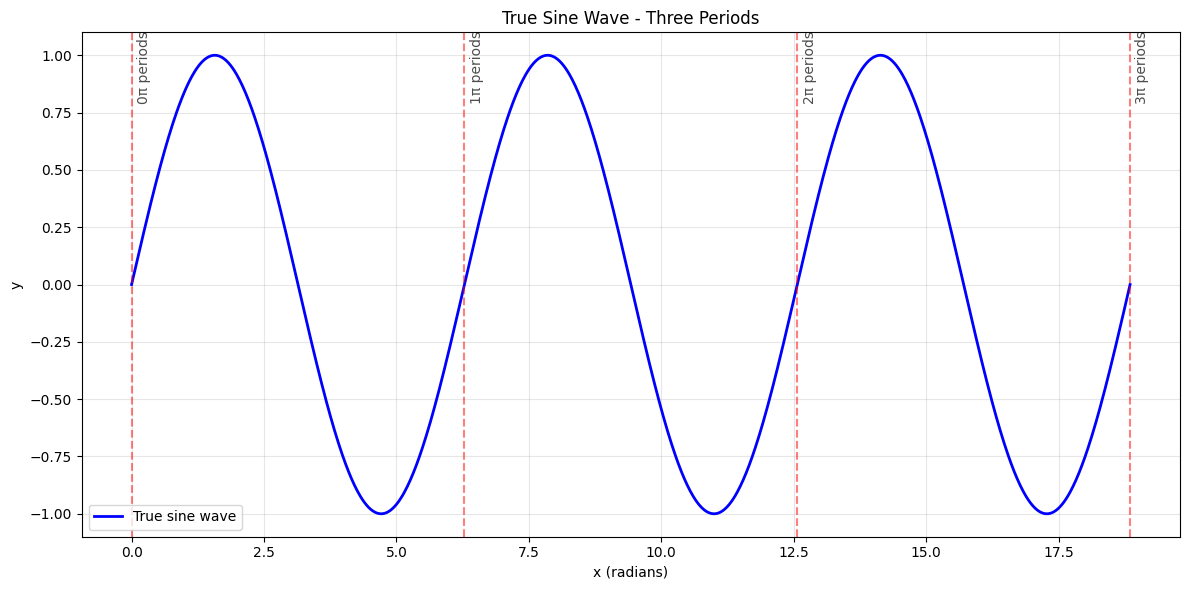

In [6]:
# Define the x range for three periods of sine
x_true = np.linspace(0, 6*np.pi, 1000)
y_true = np.sin(x_true)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x_true, y_true, 'b-', linewidth=2, label='True sine wave')
plt.grid(True, alpha=0.3)
plt.xlabel('x (radians)')
plt.ylabel('y')
plt.title('True Sine Wave - Three Periods')
plt.legend()

# Add period markers
for i in range(4):
    plt.axvline(i * 2 * np.pi, color='red', linestyle='--', alpha=0.5)
    plt.text(i * 2 * np.pi + 0.1, 0.8, f'{i}π periods', rotation=90, alpha=0.7)

plt.tight_layout()
plt.show()

## Step 2: Numerical Integration Using Euler's Method

The formula for Euler's method is:

$$
m_i = \frac{dy}{dx} = \frac{d}{dx} \sin(x) = \cos(x) \\ 

y_{i+1} = y_i + m_i \Delta x 
$$

First we take the derivative at a point. The we use that derivative as the slope in the line equation, $y = mx+b$, to determine the y value of the next point. 



In [ ]:
def euler_integrate_sine(N_steps):
    """
    Numerically integrate sine wave using Euler's method
    
    Parameters:
    N_steps: Number of steps to divide the x-axis into
    
    Returns:
    x_values, y_values: Arrays of x and y coordinates
    """
    # Define the range and step size
    x_start = 0
    x_end = 6 * np.pi
    step_size = (x_end - x_start) / N_steps
    
    # Initialize arrays
    x_values = np.zeros(N_steps + 1)
    y_values = np.zeros(N_steps + 1)
    
    # Initial conditions
    x_values[0] = x_start
    y_values[0] = np.sin(x_start)  # sin(0) = 0
    
    # Numerical integration using Euler's method
    for i in range(N_steps):
        # Current position
        x_current = x_values[i]
        y_current = y_values[i]
        
        # Calculate slope (derivative of sin(x) is cos(x))
        slope = np.cos(x_current)
        
        # Predict next values
        x_values[i + 1] = x_current + step_size
        y_values[i + 1] = y_current + slope * step_size
    
    return x_values, y_values

# Test with different step sizes
N_steps_coarse = 50   # Coarse integration
N_steps_fine = 200    # Fine integration

x_coarse, y_coarse = euler_integrate_sine(N_steps_coarse)
x_fine, y_fine = euler_integrate_sine(N_steps_fine)

print(f"Coarse integration: {N_steps_coarse} steps")
print(f"Fine integration: {N_steps_fine} steps")

Coarse integration: 50 steps
Fine integration: 200 steps


## Step 3: Compare True vs Numerical Solutions

Let's plot both the true sine wave and our numerical approximations to see how the error accumulates.

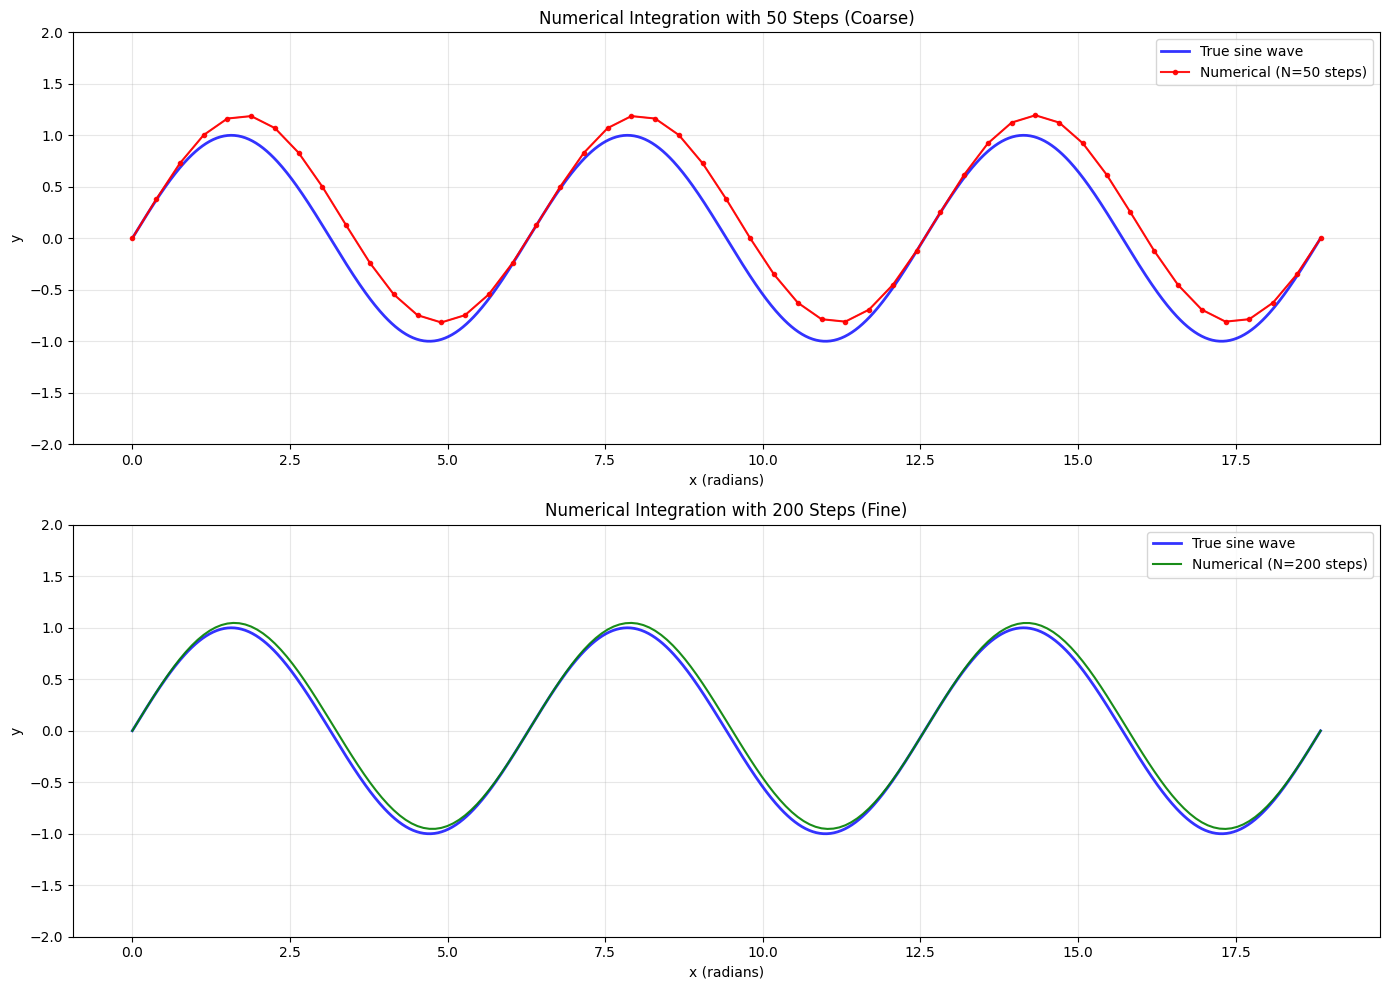

In [8]:
# Create comparison plot
plt.figure(figsize=(14, 10))

# Plot 1: Coarse integration
plt.subplot(2, 1, 1)
plt.plot(x_true, y_true, 'b-', linewidth=2, label='True sine wave', alpha=0.8)
plt.plot(x_coarse, y_coarse, 'r-', linewidth=1.5, marker='o', markersize=3, 
         label=f'Numerical (N={N_steps_coarse} steps)', alpha=0.9)

# Draw line segments to show the step-by-step integration
for i in range(len(x_coarse)-1):
    plt.plot([x_coarse[i], x_coarse[i+1]], [y_coarse[i], y_coarse[i+1]], 
             'r-', alpha=0.6, linewidth=1)

plt.grid(True, alpha=0.3)
plt.xlabel('x (radians)')
plt.ylabel('y')
plt.title(f'Numerical Integration with {N_steps_coarse} Steps (Coarse)')
plt.legend()
plt.ylim(-2, 2)

# Plot 2: Fine integration
plt.subplot(2, 1, 2)
plt.plot(x_true, y_true, 'b-', linewidth=2, label='True sine wave', alpha=0.8)
plt.plot(x_fine, y_fine, 'g-', linewidth=1.5, 
         label=f'Numerical (N={N_steps_fine} steps)', alpha=0.9)

plt.grid(True, alpha=0.3)
plt.xlabel('x (radians)')
plt.ylabel('y')
plt.title(f'Numerical Integration with {N_steps_fine} Steps (Fine)')
plt.legend()
plt.ylim(-2, 2)

plt.tight_layout()
plt.show()

## Close Up 

Here is a close up from 0 to $\frac{\pi}{2}$


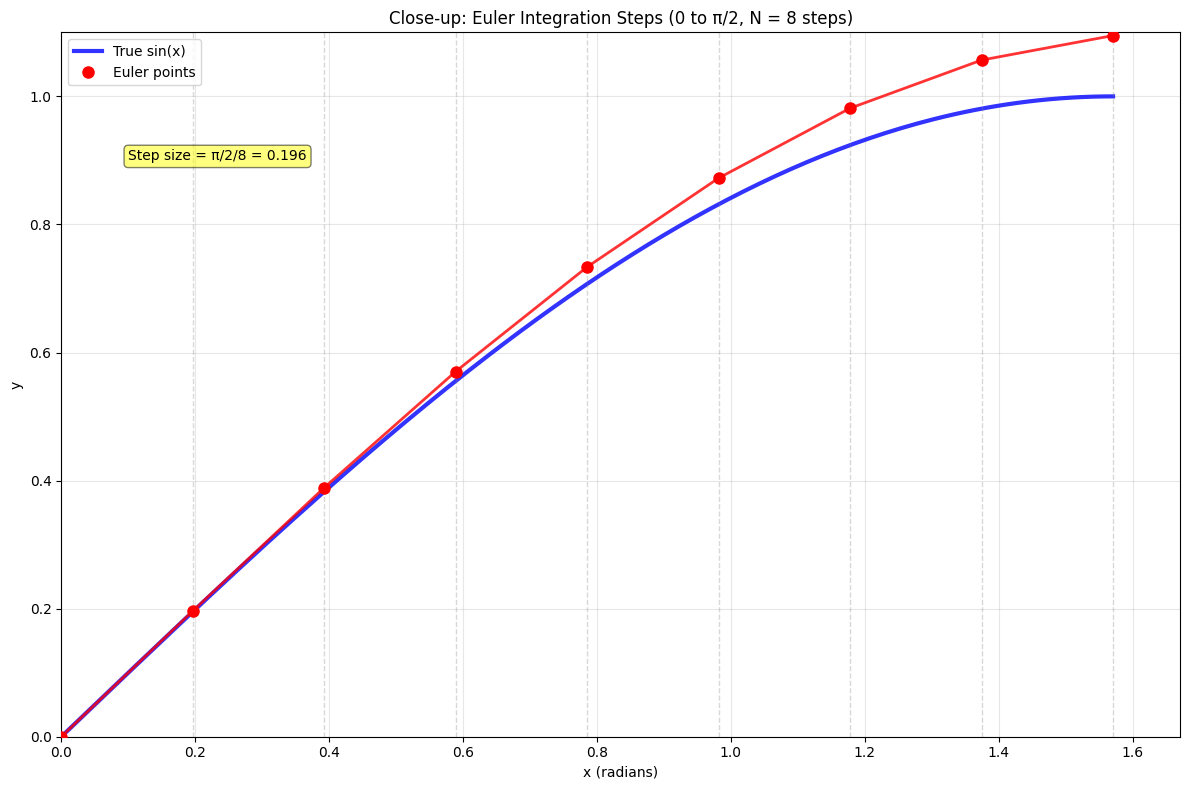

In [16]:
# Create a close-up view from 0 to π/2 to show the linear approximation steps clearly
x_closeup_end = np.pi / 2
N_steps_closeup = 8  # Use fewer steps to clearly see the line segments

# Generate Euler integration for the close-up
x_start_closeup = 0
step_size_closeup = x_closeup_end / N_steps_closeup

x_euler_closeup = np.zeros(N_steps_closeup + 1)
y_euler_closeup = np.zeros(N_steps_closeup + 1)

# Initial conditions
x_euler_closeup[0] = x_start_closeup
y_euler_closeup[0] = np.sin(x_start_closeup)  # sin(0) = 0

# Perform Euler integration
for i in range(N_steps_closeup):
    x_current = x_euler_closeup[i]
    y_current = y_euler_closeup[i]
    
    # Calculate slope (derivative)
    slope = np.cos(x_current)
    
    # Next point
    x_euler_closeup[i + 1] = x_current + step_size_closeup
    y_euler_closeup[i + 1] = y_current + slope * step_size_closeup

# True sine wave for comparison
x_true_closeup = np.linspace(0, x_closeup_end, 200)
y_true_closeup = np.sin(x_true_closeup)

# Create the close-up plot
plt.figure(figsize=(12, 8))
plt.plot(x_true_closeup, y_true_closeup, 'b-', linewidth=3, label='True sin(x)', alpha=0.8)

# Plot the Euler points
plt.plot(x_euler_closeup, y_euler_closeup, 'ro', markersize=8, label='Euler points', zorder=5)

# Draw the straight line segments clearly
for i in range(len(x_euler_closeup) - 1):
    plt.plot([x_euler_closeup[i], x_euler_closeup[i+1]], 
             [y_euler_closeup[i], y_euler_closeup[i+1]], 
             'r-', linewidth=2, alpha=0.8)
    

# Add vertical lines to show the step intervals
for i in range(1, len(x_euler_closeup)):
    plt.axvline(x_euler_closeup[i], color='gray', linestyle='--', alpha=0.3, linewidth=1)

plt.grid(True, alpha=0.3)
plt.xlabel('x (radians)')
plt.ylabel('y')
plt.title(f'Close-up: Euler Integration Steps (0 to π/2, N = {N_steps_closeup} steps)')
plt.legend()
plt.xlim(0, x_closeup_end + 0.1)
plt.ylim(0, 1.1)

# Add text showing the step size
plt.text(0.1, 0.9, f'Step size = π/2/{N_steps_closeup} = {step_size_closeup:.3f}', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))

plt.tight_layout()
plt.show()





Notice that all of the red line segments are completely straight, while  the blue line is always curving, so there is always at least a little bit of error between them. 




## Step 4: Visualize the Integration Error

Let's calculate and plot the error between the true sine wave and our numerical approximations.

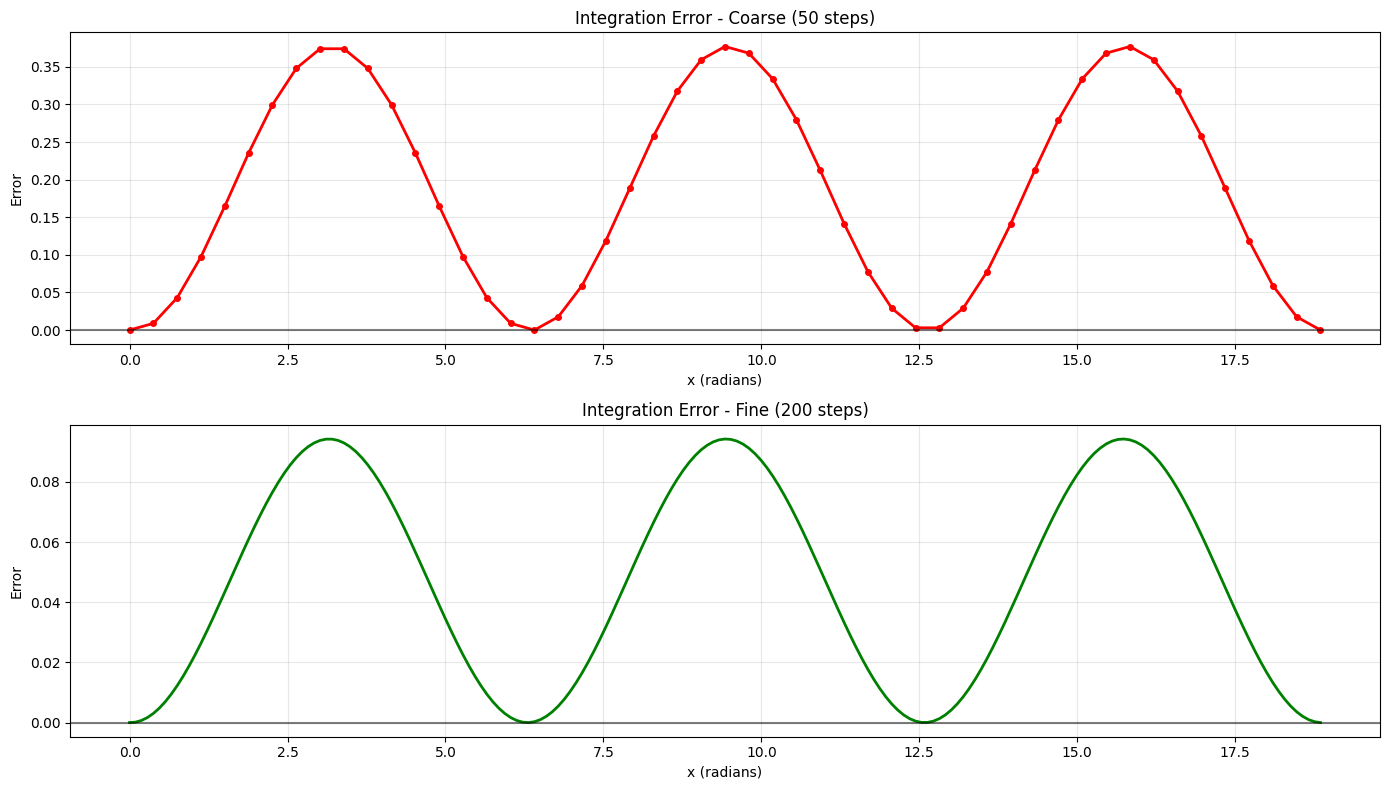

Final error (coarse): -0.0000
Final error (fine): -0.0000
Maximum absolute error (coarse): 0.3770
Maximum absolute error (fine): 0.0942


In [9]:
# Calculate errors by interpolating the true values at our numerical points
error_coarse = y_coarse - np.sin(x_coarse)
error_fine = y_fine - np.sin(x_fine)

# Plot the errors
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(x_coarse, error_coarse, 'r-', linewidth=2, marker='o', markersize=4)
plt.grid(True, alpha=0.3)
plt.xlabel('x (radians)')
plt.ylabel('Error')
plt.title(f'Integration Error - Coarse ({N_steps_coarse} steps)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.subplot(2, 1, 2)
plt.plot(x_fine, error_fine, 'g-', linewidth=2)
plt.grid(True, alpha=0.3)
plt.xlabel('x (radians)')
plt.ylabel('Error')
plt.title(f'Integration Error - Fine ({N_steps_fine} steps)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

# Print final errors
print(f"Final error (coarse): {error_coarse[-1]:.4f}")
print(f"Final error (fine): {error_fine[-1]:.4f}")
print(f"Maximum absolute error (coarse): {np.max(np.abs(error_coarse)):.4f}")
print(f"Maximum absolute error (fine): {np.max(np.abs(error_fine)):.4f}")

## Step 5: Interactive Demonstration

Let's create an interactive way to see how the number of steps affects the integration accuracy.

Comparing different step sizes:
N =  20: Final error = -0.00000000
N =  50: Final error = -0.00000000
N = 100: Final error = 0.00000000
N = 200: Final error = -0.00000000
N = 500: Final error = -0.00000000


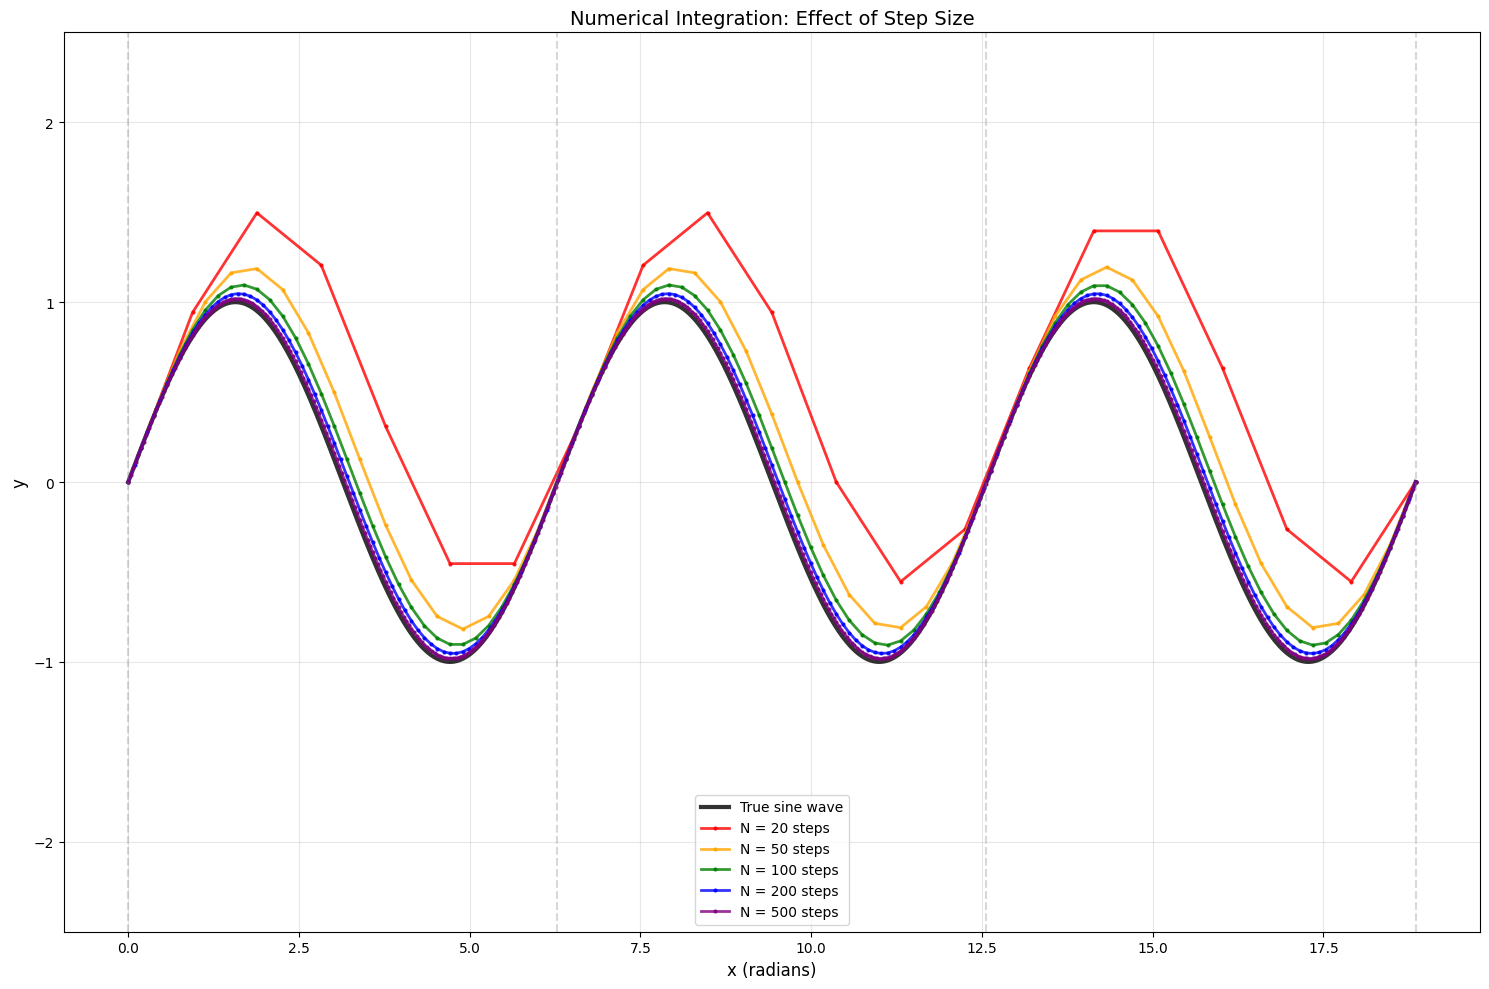

In [ ]:
def compare_integration_steps(step_counts):
    """
    Compare numerical integration with different step counts
    """
    plt.figure(figsize=(15, 10))
    
    # Plot true sine wave
    plt.plot(x_true, y_true, 'k-', linewidth=3, label='True sine wave', alpha=0.8)
    
    colors = ['red', 'orange', 'green', 'blue', 'purple']
    
    for i, N in enumerate(step_counts):
        x_num, y_num = euler_integrate_sine(N)
        color = colors[i % len(colors)]
        
        plt.plot(x_num, y_num, color=color, linewidth=2, 
                label=f'N = {N} steps', alpha=0.8, marker='o', markersize=2)
        
        # Calculate final error
        final_error = y_num[-1] - np.sin(x_num[-1])
        print(f"N = {N:3d}: Final error = {final_error:8.8f}")
    
    plt.grid(True, alpha=0.3)
    plt.xlabel('x (radians)', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title('Numerical Integration: Effect of Step Size', fontsize=14)
    plt.legend()
    plt.ylim(-2.5, 2.5)
    
    # Add period markers
    for i in range(4):
        plt.axvline(i * 2 * np.pi, color='gray', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Test with different step counts
step_counts = [20, 50, 100, 200, 500]
print("Comparing different step sizes:")
print("="*40)
compare_integration_steps(step_counts)

In [ ]:
# Standard Integrators




/var/folders/ns/_96n1s294bj9970ktj_ms9th0000gn/T/ipykernel_60961/3882346448.py:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  y_numpy[i] = np.trapz(y_integrate, x_integrate)


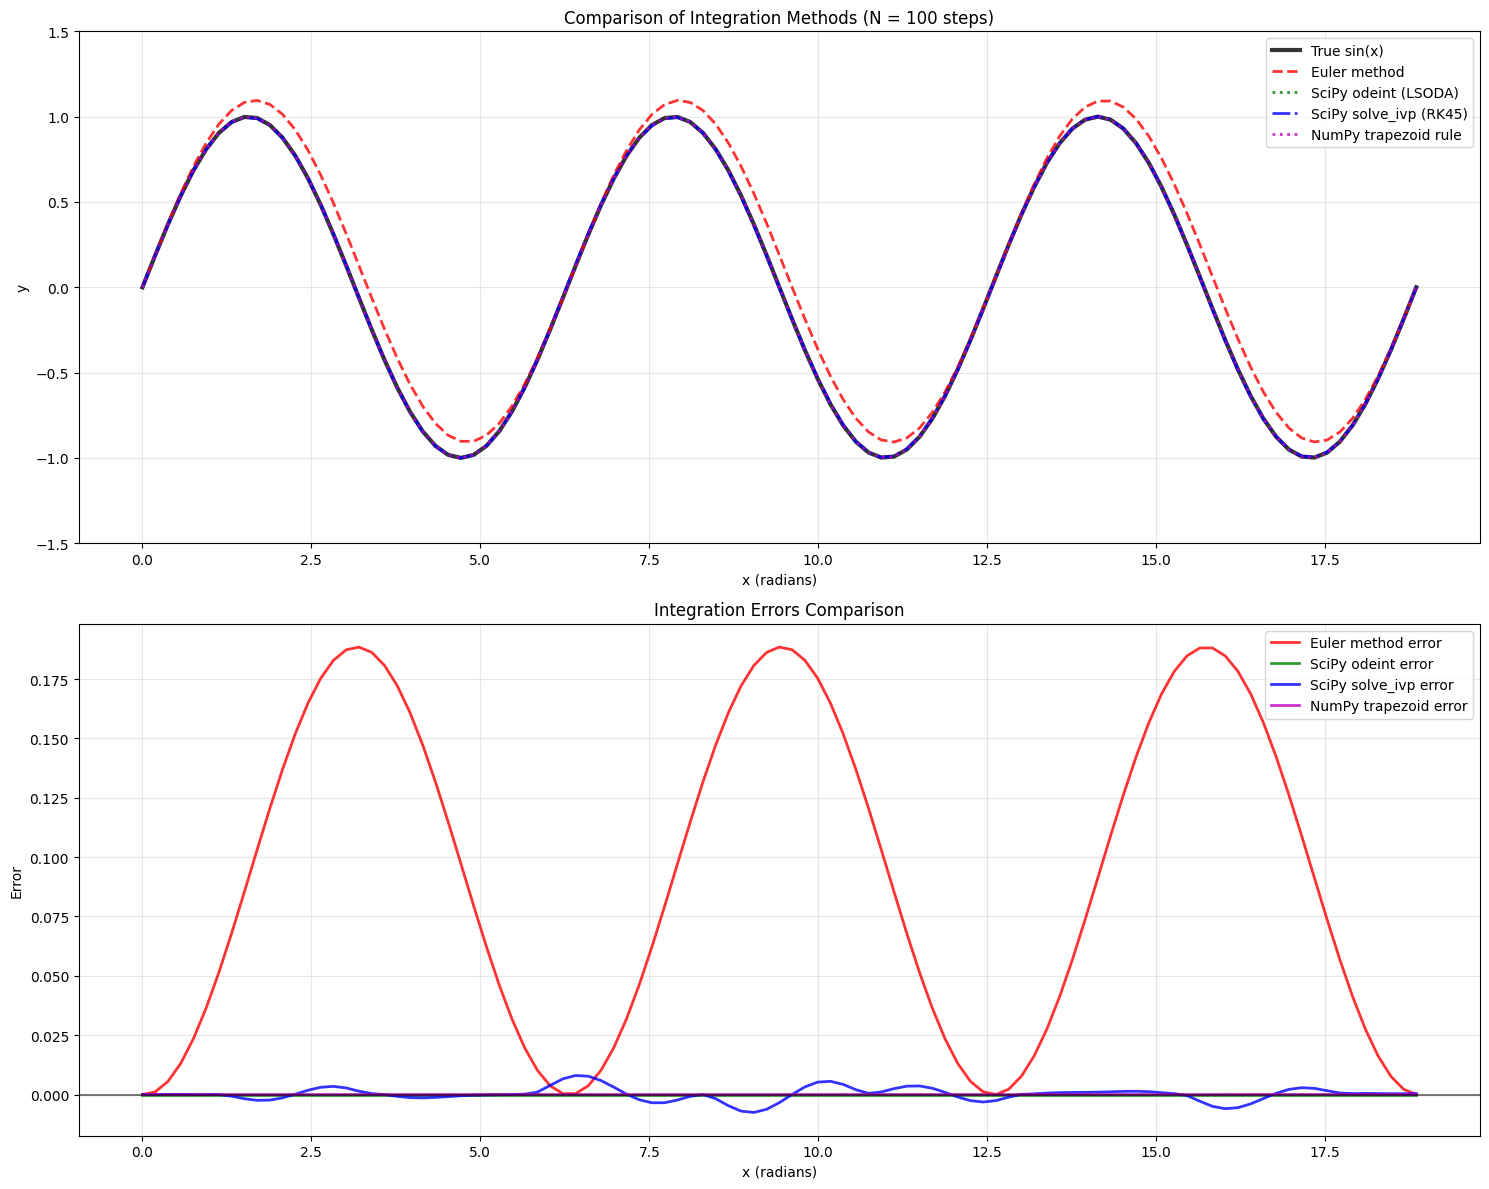

Error Statistics at Final Point (x = 6π):
Euler method:        0.00000000
SciPy odeint:        0.00000024
SciPy solve_ivp:     0.00037933
NumPy trapezoid:     0.00000000

Maximum Absolute Errors:
Euler method:        0.18849561
SciPy odeint:        0.00000037
SciPy solve_ivp:     0.00801626
NumPy trapezoid:     0.00002506

Root Mean Square (RMS) Errors:
Euler method:        0.11487554
SciPy odeint:        0.00000026
SciPy solve_ivp:     0.00283414
NumPy trapezoid:     0.00000927


In [ ]:
from scipy.integrate import odeint, solve_ivp
from scipy import integrate

# Define the differential equation: dy/dx = cos(x) for y = sin(x)
def sine_derivative(y, x):
    """Derivative function for odeint: dy/dx = cos(x)"""
    return np.cos(x)

def sine_derivative_ivp(x, y):
    """Derivative function for solve_ivp: dy/dx = cos(x)"""
    return np.cos(x)

# Set up comparison parameters
N_steps = 100
x_start = 0
x_end = 6 * np.pi
x_points = np.linspace(x_start, x_end, N_steps + 1)

# 1. Euler's method (our implementation)
x_euler, y_euler = euler_integrate_sine(N_steps)

# 2. SciPy's odeint (uses LSODA algorithm)
y_odeint = odeint(sine_derivative, 0, x_points).flatten()

# 3. SciPy's solve_ivp (modern interface, uses RK45 by default)
sol_ivp = solve_ivp(sine_derivative_ivp, [x_start, x_end], [0], 
                    t_eval=x_points, method='RK45')
y_solve_ivp = sol_ivp.y[0]

# 4. NumPy's trapezoid rule integration (integrate cos(x) from 0 to x)
def numpy_integration():
    """Use NumPy's trapezoid rule to integrate cos(x)"""
    y_numpy = np.zeros_like(x_points)
    for i in range(1, len(x_points)):
        # Integrate cos(x) from 0 to x_points[i]
        x_integrate = np.linspace(0, x_points[i], 1000)
        y_integrate = np.cos(x_integrate)
        y_numpy[i] = np.trapz(y_integrate, x_integrate)
    return y_numpy

y_numpy = numpy_integration()

# 5. True analytical solution
y_true_points = np.sin(x_points)

# Calculate errors
error_euler = y_euler - y_true_points
error_odeint = y_odeint - y_true_points
error_solve_ivp = y_solve_ivp - y_true_points
error_numpy = y_numpy - y_true_points

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Solutions comparison
ax1.plot(x_points, y_true_points, 'k-', linewidth=3, label='True sin(x)', alpha=0.8)
ax1.plot(x_euler, y_euler, 'r--', linewidth=2, label='Euler method', alpha=0.8)
ax1.plot(x_points, y_odeint, 'g:', linewidth=2, label='SciPy odeint (LSODA)', alpha=0.8)
ax1.plot(x_points, y_solve_ivp, 'b-.', linewidth=2, label='SciPy solve_ivp (RK45)', alpha=0.8)
ax1.plot(x_points, y_numpy, 'm:', linewidth=2, label='NumPy trapezoid rule', alpha=0.8)

ax1.set_xlabel('x (radians)')
ax1.set_ylabel('y')
ax1.set_title(f'Comparison of Integration Methods (N = {N_steps} steps)')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_ylim(-1.5, 1.5)

# Plot 2: Error comparison
ax2.plot(x_euler, error_euler, 'r-', linewidth=2, label='Euler method error', alpha=0.8)
ax2.plot(x_points, error_odeint, 'g-', linewidth=2, label='SciPy odeint error', alpha=0.8)
ax2.plot(x_points, error_solve_ivp, 'b-', linewidth=2, label='SciPy solve_ivp error', alpha=0.8)
ax2.plot(x_points, error_numpy, 'm-', linewidth=2, label='NumPy trapezoid error', alpha=0.8)

ax2.set_xlabel('x (radians)')
ax2.set_ylabel('Error')
ax2.set_title('Integration Errors Comparison')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

# Print error statistics
print("Error Statistics at Final Point (x = 6π):")
print("="*50)
print(f"Euler method:      {error_euler[-1]:12.8f}")
print(f"SciPy odeint:      {error_odeint[-1]:12.8f}")
print(f"SciPy solve_ivp:   {error_solve_ivp[-1]:12.8f}")
print(f"NumPy trapezoid:   {error_numpy[-1]:12.8f}")

print("\nMaximum Absolute Errors:")
print("="*50)
print(f"Euler method:      {np.max(np.abs(error_euler)):12.8f}")
print(f"SciPy odeint:      {np.max(np.abs(error_odeint)):12.8f}")
print(f"SciPy solve_ivp:   {np.max(np.abs(error_solve_ivp)):12.8f}")
print(f"NumPy trapezoid:   {np.max(np.abs(error_numpy)):12.8f}")

print("\nRoot Mean Square (RMS) Errors:")
print("="*50)
print(f"Euler method:      {np.sqrt(np.mean(error_euler**2)):12.8f}")
print(f"SciPy odeint:      {np.sqrt(np.mean(error_odeint**2)):12.8f}")
print(f"SciPy solve_ivp:   {np.sqrt(np.mean(error_solve_ivp**2)):12.8f}")
print(f"NumPy trapezoid:   {np.sqrt(np.mean(error_numpy**2)):12.8f}")

## Key Observations

From this demonstration, we can observe several important points about numerical integration:

### 1. **Error Accumulation**
- Errors grow over time as we integrate
- The error is not random - it has a systematic drift
- Longer integration periods lead to larger accumulated errors

### 2. **Step Size Matters**
- Smaller step sizes (more steps) generally give better accuracy
- However, even with many steps, some error persists
- There's a trade-off between computational cost and accuracy

### 3. **Method Limitations**
- Euler's method is simple but not the most accurate
- The error grows approximately linearly with the step size
- More sophisticated methods (Runge-Kutta, etc.) can reduce but not eliminate errors

### 4. **Real-World Implications**
This same type of error accumulation happens in:
- Orbital mechanics simulations
- Weather prediction models
- Any system where we integrate over time

The key takeaway is that **all numerical integration methods accumulate errors**, and this is something we must account for in our simulations.